# Invasive species image recognition with iNaturalist 2017 computer vision model

explain



In [701]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

## Dataset information of invasise species

In [702]:
df_2 = pd.read_csv('../data/IASa.csv', delimiter=';',encoding='latin-1')
df_2.head(10)

,mongodb_id,id_easin,scientific_name,common_name,type,family,Status,image,image_number,photo
0,574ee5281f2e00013cc1c2b1,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_574ee5281f2e00013cc1c2b1_0.jpg,0,NaN
1,574ee5361f2e00013cc1c2b2,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_574ee5361f2e00013cc1c2b2_0.jpg,0,NaN
2,57553d9e1f2e00013cc1c2d4,R13698,Sciurus carolinensis,American grey squirrel,Animalia,Mammalia,Discarded,R13698_57553d9e1f2e00013cc1c2d4_0.jpg,0,NaN
3,57554e821f2e00013cc1c2d5,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_57554e821f2e00013cc1c2d5_0.jpg,0,NaN
4,57554e921f2e00013cc1c2d6,R08062,Lagarosiphon major,African elodea,Plantae,Tracheophyta,Discarded,R08062_57554e921f2e00013cc1c2d6_0.jpg,0,NaN
5,57554e971f2e00013cc1c2d7,R13698,Sciurus carolinensis,American grey squirrel,Animalia,Mammalia,Discarded,R13698_57554e971f2e00013cc1c2d7_0.jpg,0,NaN
6,57554ea31f2e00013cc1c2d9,R13698,Sciurus carolinensis,American grey squirrel,Animalia,Mammalia,Discarded,R13698_57554ea31f2e00013cc1c2d9_0.jpg,0,NaN
7,57554ec61f2e00013cc1c2de,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Validated,R12250_57554ec61f2e00013cc1c2de_0.jpg,0,NaN
8,57554ece1f2e00013cc1c2df,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_57554ece1f2e00013cc1c2df_0.jpg,0,NaN
9,57554ed31f2e00013cc1c2e0,R15970,Vespa velutina nigrithorax,Yellow-legged hornet,Animalia,Arthropoda,Unclear,R15970_57554ed31f2e00013cc1c2e0_0.jpg,0,NaN


### dataset contains

## Number of data and atributes

In [703]:
df_2.shape

(1192, 10)

## List of distinct species and their number

In [704]:
list = df_2.scientific_name.unique()
list

array(['Procambarus clarkii', 'Sciurus carolinensis',
       'Lagarosiphon major', 'Vespa velutina nigrithorax',
       'Trachemys scripta',
       'Pueraria montana var. lobata = Pueraria lobata',
       'Cabomba caroliniana', 'Baccharis halimifolia',
       'Heracleum persicum', 'Hydrocotyle ranunculoides',
       'Myriophyllum aquaticum', 'Myocastor coypus', 'Orconectes limosus',
       'Eriocheir sinensis', 'Pseudorasbora parva', 'Perccottus glenii',
       'Eichhornia crassipes', 'Lysichiton americanus',
       'Lithobates catesbeianus', 'Orconectes virilis',
       'Parthenium hysterophorus', 'Persicaria perfoliata',
       'Procyon lotor', 'Heracleum sosnowskyi',
       'Pacifastacus leniusculus', 'Alopochen aegyptiacus',
       'Impatiens glandulifera', 'Alternanthera philoxeroides',
       'Myriophyllum heterophyllum', 'Corvus splendens', 'Nasua nasua',
       'Heracleum mantegazzianum', 'Non EASIN species',
       'Gunnera tinctoria', 'Threskiornis aethiopicus',
       'Sinan

## Number of distinct species


In [705]:
len(df_2.scientific_name.unique())

59

Text(0, 0.5, 'Frequency')

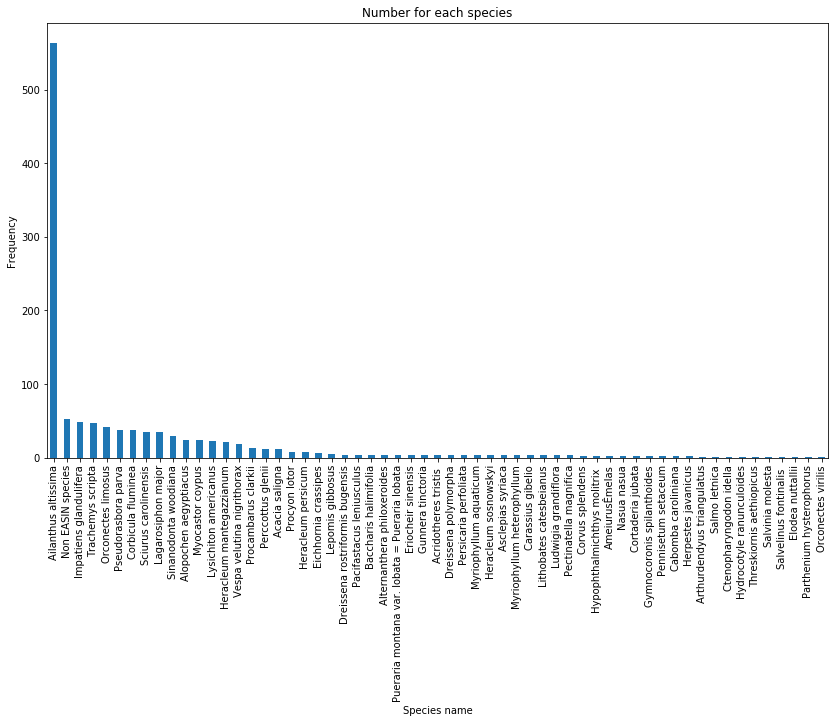

In [706]:
ax = df_2['scientific_name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each species")
ax.set_xlabel("Species name")
ax.set_ylabel("Frequency")

In [707]:
df_2['scientific_name'].value_counts()

Ailanthus altissima                               563
Non EASIN species                                  53
Impatiens glandulifera                             48
Trachemys scripta                                  47
Orconectes limosus                                 42
Pseudorasbora parva                                38
Corbicula fluminea                                 38
Sciurus carolinensis                               35
Lagarosiphon major                                 35
Sinanodonta woodiana                               29
Alopochen aegyptiacus                              24
Myocastor coypus                                   24
Lysichiton americanus                              23
Heracleum mantegazzianum                           21
Vespa velutina nigrithorax                         18
Procambarus clarkii                                13
Perccottus glenii                                  12
Acacia saligna                                     11
Procyon lotor               

# iNaturalist list of species 2017 competition 

In [711]:
df_3=pd.read_csv('../data/iNat-2017.csv')

## Which species are found in iNaturalist 2017

In [712]:
df_n=pd.merge(df_2, df_3,how='inner', on='scientific_name')


In [713]:
len(df_n['scientific_name'].value_counts())

18

Text(0, 0.5, 'Frequency')

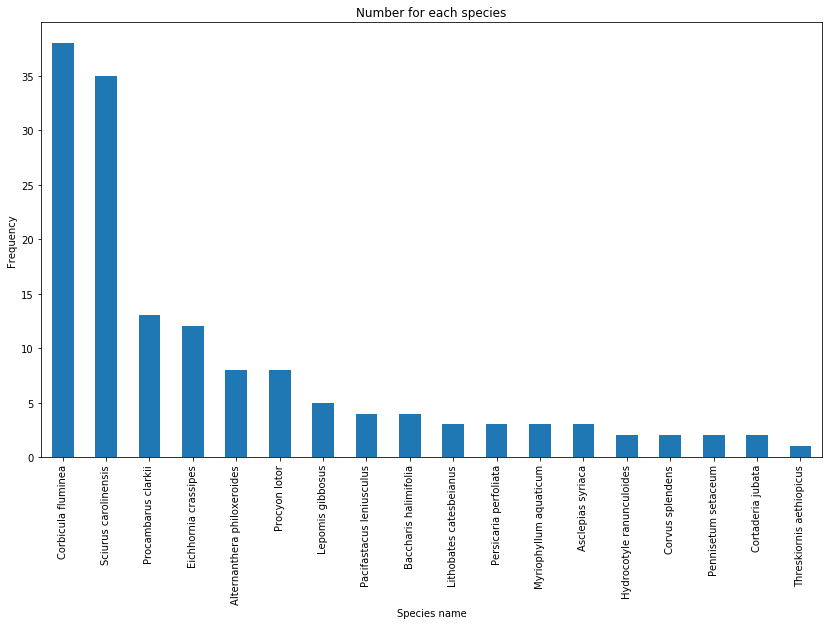

In [714]:
ax = df_n['scientific_name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number for each species")
ax.set_xlabel("Species name")
ax.set_ylabel("Frequency")

In [715]:
df_n

,mongodb_id,id_easin,scientific_name,common_name,type,family,Status,image,image_number,photo
0,574ee5281f2e00013cc1c2b1,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_574ee5281f2e00013cc1c2b1_0.jpg,0,NaN
1,574ee5361f2e00013cc1c2b2,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_574ee5361f2e00013cc1c2b2_0.jpg,0,NaN
2,57554e821f2e00013cc1c2d5,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_57554e821f2e00013cc1c2d5_0.jpg,0,NaN
3,57554ec61f2e00013cc1c2de,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Validated,R12250_57554ec61f2e00013cc1c2de_0.jpg,0,NaN
4,57554ece1f2e00013cc1c2df,R12250,Procambarus clarkii,Red swamp crayfish,Animalia,Arthropoda,Discarded,R12250_57554ece1f2e00013cc1c2df_0.jpg,0,NaN
...,...,...,...,...,...,...,...,...,...,...
143,5debe3381d2b6741a2e01f4c,R04013,Corbicula fluminea,Scoica asiatic_,Animalia,Arthropoda,Validated,R04013_5debe3381d2b6741a2e01f4c_0.jpg,0,NaN
144,5dc91b3445d0d0f20cec61a9,R19708,Cortaderia jubata,Pampa grass,Plantae,Tracheophyta,Unclear,R19708_5dc91b3445d0d0f20cec61a9_0.jpg,0,NaN
145,5dc91b3445d0d0f20cec61a9,R19708,Cortaderia jubata,Pampa grass,Plantae,Tracheophyta,Unclear,R19708_5dc91b3445d0d0f20cec61a9_1.jpg,1,NaN
146,5dcd2d7614ca6438c35e7957,R03000,Pennisetum setaceum,Fountain grass,Plantae,Tracheophyta,Validated,R03000_5dcd2d7614ca6438c35e7957_0.jpg,0,NaN


## Select only the validated images

In [716]:
df_f=df_n.loc[df_n['Status']== 'Validated', ['scientific_name','image']]

In [717]:
df_f=df_f.drop_duplicates()

In [718]:
df_f

,scientific_name,image
3,Procambarus clarkii,R12250_57554ec61f2e00013cc1c2de_0.jpg
6,Procambarus clarkii,R12250_57a85ee71f2e00013cc1c34d_0.jpg
9,Procambarus clarkii,R12250_5bdc83f8de386109b1dabd1d_0.jpg
12,Procambarus clarkii,R12250_5d4fdda0969578791a73d932_0.jpg
17,Sciurus carolinensis,R13698_58a46554482da315695c716b_0.jpg
...,...,...
141,Corbicula fluminea,R04013_5debb1691d2b6741a2e01f3f_0.jpg
142,Corbicula fluminea,R04013_5debd4301d2b6741a2e01f4a_0.jpg
143,Corbicula fluminea,R04013_5debe3381d2b6741a2e01f4c_0.jpg
146,Pennisetum setaceum,R03000_5dcd2d7614ca6438c35e7957_0.jpg


# Predict results 

In [719]:
import requests
import argparse
from os import listdir
from os.path import isfile, join

URL = 'http://127.0.0.1:5000/predict'

## Send image to server and get results

In [720]:
def predict_result(image_path):
    # Initialize image path
    mypath='../datasets/'
    image = open(mypath+image_path, 'rb').read()
    payload = {'image': image}
    output_string=''
    r = requests.post(URL, files=payload).json()

    # Ensure the request was successful.
    if r['success']:
        # Loop over the predictions and display them.
        #print(image_path,end ="\t")
        output_string=output_string+image_path +';'
        
        for (i, result) in enumerate(r['predictions']):
            #print(' {}: {:.4f}'.format(result['label'],result['probability']),end ="\t")
            output_string=output_string+'{}'.format(result['label'])+';' +'{:.4f}'.format(result['probability'])+';'
    
        
        #print(output_string)
    # Otherwise, the request failed.
    else:
        print('Request failed')
    
    return output_string

## Write results in file

In [ ]:
output_all=''
for x in df_f['image']:
    print(x)
    string = predict_result(x)
    #string=''
    output_all=output_all+string+ '\n'
    
#print(output_all)

text_file = open("..\data\Output-fin.csv", "w")
text_file.write(output_all)
text_file.close()


R12250_57554ec61f2e00013cc1c2de_0.jpg
R12250_57a85ee71f2e00013cc1c34d_0.jpg
R12250_5bdc83f8de386109b1dabd1d_0.jpg
R12250_5d4fdda0969578791a73d932_0.jpg
R13698_58a46554482da315695c716b_0.jpg


## Open results from the file and save it in dataset

In [722]:
header_list = ['image', 'P1', 'Q1','P2', 'Q2','P3', 'Q3','P4', 'Q4','P5', 'Q5','P6', 'Q6']
df_predict = pd.read_csv('Output-fin.csv', delimiter=';',names=header_list, index_col=False)
df_predict

,image,P1,Q1,P2,Q2,P3,Q3,P4,Q4,P5,Q5,P6,Q6
0,R12250_57554ec61f2e00013cc1c2de_0.jpg,Procambarus clarkii,0.9133,Paranephrops planifrons,0.0456,Jasus edwardsii,0.0212,Homarus americanus,0.0050,Grapsus tenuicrustatus,0.0030,Potamogeton crispus,0.0012
1,R12250_57a85ee71f2e00013cc1c34d_0.jpg,Castor canadensis,0.1997,Myocastor coypus,0.0848,Lontra canadensis,0.0632,Tamias striatus,0.0512,Sceloporus occidentalis,0.0363,Dasypus novemcinctus,0.0319
2,R12250_5bdc83f8de386109b1dabd1d_0.jpg,Terrapene carolina,0.0975,Carduelis carduelis,0.0435,Anaxyrus americanus,0.0339,Lithobates sylvaticus,0.0245,Bombus ternarius,0.0162,Lithobates clamitans,0.0150
3,R12250_5d4fdda0969578791a73d932_0.jpg,Procambarus clarkii,0.7797,Phytolacca americana,0.1768,Romalea microptera,0.0106,Chrysemys picta,0.0085,Battus philenor,0.0083,Farancia abacura,0.0074
4,R13698_58a46554482da315695c716b_0.jpg,Sciurus carolinensis,0.9999,Sciurus alleni,0.0001,Sciurus griseus,0.0000,Sciurus arizonensis,0.0000,Tamiasciurus hudsonicus,0.0000,Sciurus yucatanensis,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,R04013_5debb1691d2b6741a2e01f3f_0.jpg,Psilocybe cubensis,0.1413,Calvia quatuordecimguttata,0.1056,Stropharia rugosoannulata,0.0452,Abortiporus biennis,0.0451,Phallus hadriani,0.0297,Erethizon dorsatum,0.0259
61,R04013_5debd4301d2b6741a2e01f4a_0.jpg,Corbicula fluminea,1.0000,Dosinia anus,0.0000,Nuttallia obscurata,0.0000,Calliostoma canaliculatum,0.0000,Betula alleghaniensis,0.0000,Lampsilis cardium,0.0000
62,R04013_5debe3381d2b6741a2e01f4c_0.jpg,Turdus migratorius,0.0963,Lithobates catesbeianus,0.0876,Lithobates clamitans,0.0770,Apis mellifera,0.0449,Anaxyrus americanus,0.0342,Sturnus vulgaris,0.0284
63,R03000_5dcd2d7614ca6438c35e7957_0.jpg,Taxodium distichum,0.7301,Dacrydium cupressinum,0.1936,Taxodium mucronatum,0.0407,Tillandsia usneoides,0.0133,Casuarina equisetifolia,0.0073,Eucalyptus camaldulensis,0.0038


## Merge results with validated images dataset

In [723]:
df=pd.merge(df_predict, df_f,how='inner', on='image')

## Calculate 1 hit and 5 hits and add it to the dataset

In [724]:
df['1_hit'] = df['P1']==df['scientific_name']
df['2_hit'] = df['P2']==df['scientific_name']
df['3_hit'] = df['P3']==df['scientific_name']
df['4_hit'] = df['P4']==df['scientific_name']
df['5_hit'] = df['P5']==df['scientific_name']

In [725]:
df['Total_5_hit'] = df['1_hit']|df['2_hit']|df['3_hit']|df['4_hit']|df['5_hit']

### Total 1 hits value count

In [726]:
t1=df['1_hit'].value_counts()

In [727]:
t1

False    42
True     23
Name: 1_hit, dtype: int64

### Total 5 hits value count

In [728]:
t2=df['Total_5_hit'].value_counts()

df.loc[df['a'] > 10, ['a','c']]

In [729]:
t2

False    34
True     31
Name: Total_5_hit, dtype: int64

## Pie chart of iNaturalist images image recognition 

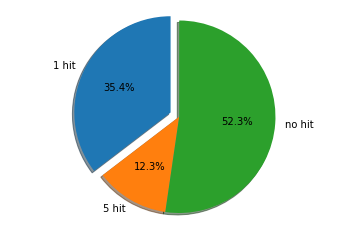

In [730]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1 hit', '5 hit', 'no hit'
sizes = [t1[1]/len(df.index), 
         t2[1]/len(df.index)-t1[1]/len(df.index),  
         1- t2[1]/len(df.index)]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Visualize the results 

## Read the 2017 iNaturalist dataset with images links

the vast majority of images are not in the iNaturalist 2017 dataset; the links don't work. For the paper will be needed to download several images and build up the visualization and explanation

The reason could be because there are invasive species, and are very low represented in the iNaturalist dataset ! have to check this fact?

In [732]:
df_iNat2017=pd.read_csv('../data/iNat-cut.csv', delimiter=';')

In [733]:
df_iNat2017
df_iNat2017.rename(columns={'Category name':'scientific_name',}, 
                 inplace=True)
df_iNat2017


,Competition ID,scientific_name,Supercategory,Image URL,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0,Marmota flaviventris,Mammalia,https://farm1.staticflickr.com/68/185318245_47d4db1e54.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Zonotrichia capensis,Aves,https://farm3.staticflickr.com/2248/2195772708_716d50d8e9.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,10,Nerodia cyclopion,Reptilia,https://farm6.staticflickr.com/5225/5691167204_9758812476.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,100,Prosthemadera novaeseelandiae novaeseelandiae,Aves,https://static.inaturalist.org/photos/1179556/medium.jpg?1444462532,NaN,NaN,NaN,NaN,NaN,NaN
4,1000,Vanellus miles,Aves,https://farm4.staticflickr.com/3252/2313697721_a5d3af28a6.jpg,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5084,5084,Murgantia histrionica,Insecta,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F7%2F7c%2FHarlequin_Bug_adult_and_nymph.jpg&size=s,NaN,NaN,NaN,NaN,NaN,NaN
5085,5085,Collomia grandiflora,Plantae,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5086,5086,Columba livia,Aves,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F2%2F2a%2FRock_pigeons_on_cliffs.jpg&size=s,NaN,NaN,NaN,NaN,NaN,NaN
5087,5087,Notarctia proxima,Insecta,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Only subset of the datataset is needed

In [734]:
df_i=df_iNat2017[['scientific_name', 'Image URL']]

In [735]:
df_i

,scientific_name,Image URL
0,Marmota flaviventris,https://farm1.staticflickr.com/68/185318245_47d4db1e54.jpg
1,Zonotrichia capensis,https://farm3.staticflickr.com/2248/2195772708_716d50d8e9.jpg
2,Nerodia cyclopion,https://farm6.staticflickr.com/5225/5691167204_9758812476.jpg
3,Prosthemadera novaeseelandiae novaeseelandiae,https://static.inaturalist.org/photos/1179556/medium.jpg?1444462532
4,Vanellus miles,https://farm4.staticflickr.com/3252/2313697721_a5d3af28a6.jpg
...,...,...
5084,Murgantia histrionica,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F7%2F7c%2FHarlequin_Bug_adult_and_nymph.jpg&size=s
5085,Collomia grandiflora,NaN
5086,Columba livia,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F2%2F2a%2FRock_pigeons_on_cliffs.jpg&size=s
5087,Notarctia proxima,NaN


In [736]:
df_new=pd.merge(df, df_i, how='left', on='scientific_name')

In [737]:
df_new

,image,P1,Q1,P2,Q2,P3,Q3,P4,Q4,P5,...,P6,Q6,scientific_name,1_hit,2_hit,3_hit,4_hit,5_hit,Total_5_hit,Image URL
0,R12250_57554ec61f2e00013cc1c2de_0.jpg,Procambarus clarkii,0.9133,Paranephrops planifrons,0.0456,Jasus edwardsii,0.0212,Homarus americanus,0.0050,Grapsus tenuicrustatus,...,Potamogeton crispus,0.0012,Procambarus clarkii,True,False,False,False,False,True,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F1a%2FProcambarus_clarkii.jpg&size=s
1,R12250_57a85ee71f2e00013cc1c34d_0.jpg,Castor canadensis,0.1997,Myocastor coypus,0.0848,Lontra canadensis,0.0632,Tamias striatus,0.0512,Sceloporus occidentalis,...,Dasypus novemcinctus,0.0319,Procambarus clarkii,False,False,False,False,False,False,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F1a%2FProcambarus_clarkii.jpg&size=s
2,R12250_5bdc83f8de386109b1dabd1d_0.jpg,Terrapene carolina,0.0975,Carduelis carduelis,0.0435,Anaxyrus americanus,0.0339,Lithobates sylvaticus,0.0245,Bombus ternarius,...,Lithobates clamitans,0.0150,Procambarus clarkii,False,False,False,False,False,False,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F1a%2FProcambarus_clarkii.jpg&size=s
3,R12250_5d4fdda0969578791a73d932_0.jpg,Procambarus clarkii,0.7797,Phytolacca americana,0.1768,Romalea microptera,0.0106,Chrysemys picta,0.0085,Battus philenor,...,Farancia abacura,0.0074,Procambarus clarkii,True,False,False,False,False,True,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F1a%2FProcambarus_clarkii.jpg&size=s
4,R13698_58a46554482da315695c716b_0.jpg,Sciurus carolinensis,0.9999,Sciurus alleni,0.0001,Sciurus griseus,0.0000,Sciurus arizonensis,0.0000,Tamiasciurus hudsonicus,...,Sciurus yucatanensis,0.0000,Sciurus carolinensis,True,False,False,False,False,True,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F5%2F53%2FEastern_Grey_Squirrel_in_St_James_s_Park%252C_London_-_Nov_2006_edit.jpg&size=s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,R04013_5debb1691d2b6741a2e01f3f_0.jpg,Psilocybe cubensis,0.1413,Calvia quatuordecimguttata,0.1056,Stropharia rugosoannulata,0.0452,Abortiporus biennis,0.0451,Phallus hadriani,...,Erethizon dorsatum,0.0259,Corbicula fluminea,False,False,False,False,False,False,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Fa0%2FFeingerippte%252C_innen_und_au%25C3%259Fen.jpg&size=s
65,R04013_5debd4301d2b6741a2e01f4a_0.jpg,Corbicula fluminea,1.0000,Dosinia anus,0.0000,Nuttallia obscurata,0.0000,Calliostoma canaliculatum,0.0000,Betula alleghaniensis,...,Lampsilis cardium,0.0000,Corbicula fluminea,True,False,False,False,False,True,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Fa0%2FFeingerippte%252C_innen_und_au%25C3%259Fen.jpg&size=s
66,R04013_5debe3381d2b6741a2e01f4c_0.jpg,Turdus migratorius,0.0963,Lithobates catesbeianus,0.0876,Lithobates clamitans,0.0770,Apis mellifera,0.0449,Anaxyrus americanus,...,Sturnus vulgaris,0.0284,Corbicula fluminea,False,False,False,False,False,False,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Fa0%2FFeingerippte%252C_innen_und_au%25C3%259Fen.jpg&size=s
67,R03000_5dcd2d7614ca6438c35e7957_0.jpg,Taxodium distichum,0.7301,Dacrydium cupressinum,0.1936,Taxodium mucronatum,0.0407,Tillandsia usneoides,0.0133,Casuarina equisetifolia,...,Eucalyptus camaldulensis,0.0038,Pennisetum setaceum,False,False,False,False,False,False,http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fe%2Fef%2FPennisetum_setaceum_habit.jpg&size=s


### Test to show 1 images from files

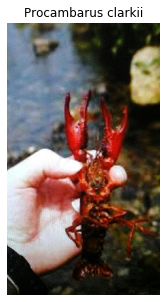

In [738]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

image_path='../datasets/'
img = load_img(image_path+df_new['image'][0])
plt.figure(figsize = (5,5))
plt.imshow(img)
plt.axis('off')
plt.title(df_new['scientific_name'][0])
plt.show()

### Test to show 1 image from internet

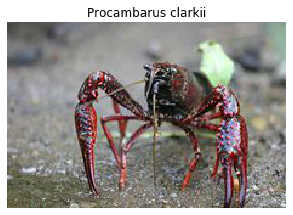

In [739]:
from PIL import Image
import requests
from io import BytesIO
pd.set_option("display.max_colwidth", 10000)

response = requests.get(df_new['Image URL'][0])
img = Image.open(BytesIO(response.content))
plt.figure(figsize = (5,5))
plt.imshow(img)
plt.axis('off')
plt.title(df_new['scientific_name'][0])
plt.show()

In [740]:
df_new['Image URL'][0]

'http://api.gbif.org/v1/image?url=http%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2F1%2F1a%2FProcambarus_clarkii.jpg&size=s'

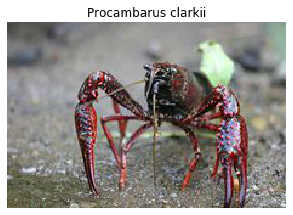

In [741]:
response = requests.get(df_i['Image URL'][2917])
img = Image.open(BytesIO(response.content))
plt.figure(figsize = (5,5))
plt.imshow(img)
plt.axis('off')
plt.title(df_new['scientific_name'][0])
plt.show()

## Function to retreive images online
 input is the scientific name of the species; and the dataset that contains the internet links 
 
 output is the image

In [748]:
def retreive_image_online(scientific_name, df_i):
    from PIL import Image
    import requests
    from io import BytesIO
    pd.set_option("display.max_colwidth", 10000)
    df=df_i.loc[df_i['scientific_name'] == scientific_name, ['scientific_name','Image URL']]
    #print (df)
    try:
        response = requests.get((df['Image URL'].iloc[0]).replace('amp;',''))
        img = Image.open(BytesIO(response.content))
    except:
        print("Something went wrong")
        img = load_img('../dataset/1.jpg')
    finally:
        print(' ')
    return img

In [749]:
t=retreive_image_online('Procambarus clarkii',df_i)

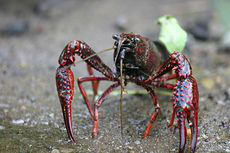

In [750]:
t

In [751]:
len(df_new)

69

In [752]:

img_list=[]
for i in range(len(df_new)):
    img = load_img(image_path+df_new['image'][i])
    img1 = retreive_image_online(df_new['scientific_name'][i], df_i)
    img_list.append(img)
    img_list.append(img1)

    #print('this is the number')
    print (i)
    
    #if i > 10:
     #   break

 
0
 
1
 
2
 
3
Something went wrong
 
4
Something went wrong
 
5
Something went wrong
 
6
Something went wrong
 
7
Something went wrong
 
8
 
9
 
10
Something went wrong
 
11
Something went wrong
 
12
Something went wrong
 
13
Something went wrong
 
14
Something went wrong
 
15
Something went wrong
 
16
Something went wrong
 
17
Something went wrong
 
18
 
19
 
20
 
21
Something went wrong
 
22
Something went wrong
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 
50
 
51
 
52
 
53
 
54
 
55
 
56
 
57
 
58
 
59
 
60
 
61
 
62
 
63
 
64
 
65
 
66
Something went wrong
 
67
Something went wrong
 
68


In [753]:
len(img_list)

138

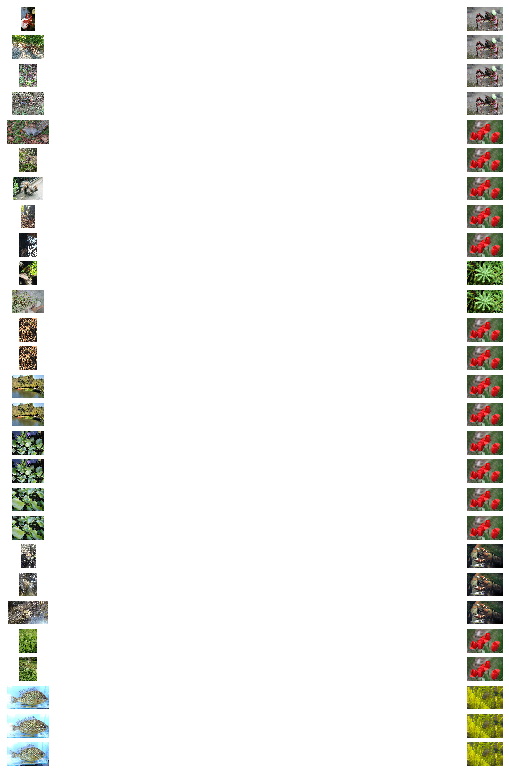

In [754]:
i = 0
fig = plt.figure(figsize = (15,15))
plt.title('Pre-processed')
for x in img_list:
    i += 1
    if i > 54:
        break
    #temp = batch.reshape(x.shape)
    plt.subplot(29, 2, i)
    plt.imshow(x)
    plt.axis('off')
plt.show()





# EXTRA code testing below

In [755]:


def gallery(array, ncols=4):
    nindex, height, width, intensity = array.shape
    nrows = nindex//ncols
    assert nindex == nrows*ncols
    # want result.shape = (height*nrows, width*ncols, intensity)
    result = (array.reshape(nrows, ncols, height, width, intensity)
              .swapaxes(1,2)
              .reshape(height*nrows, width*ncols, intensity))
    return result

def make_array():
    from PIL import Image
    return np.array([np.asarray(Image.open('1.jpg').convert('RGB'))]*16)

array = make_array()
result = gallery(array)
plt.imshow(result)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '1.jpg'